# Natural Language Processing 1
## Exercise sheet 3: $\texttt{word2vec}$ and word embeddings

### Instructions

Fill in the numerical answers in the provided code cells. Submit the completed notebook when done. Reasoning is required only where specified.

- Numerical answers should be stored in variables in the provided code cells.
- Reasoning and detailed calculations should be added in the designated text cells.
- Do **not** modify the variable names or the structure of the notebook.
- Save and download your notebook with the following naming convention: `STUDENT_ID.ipynb`, where `STUDENT_ID` is your university-assigned ID.
- Upload the notebook to Moodle in the **Exercises** section. Make sure the file is correctly named before submitting.



### Exercise 1: Are word vectors fully determined by similarity scores? [MU]

Provide your answer and the accompanying mathematical proof below. Try to be precise, clear, and rigorous in your proof.


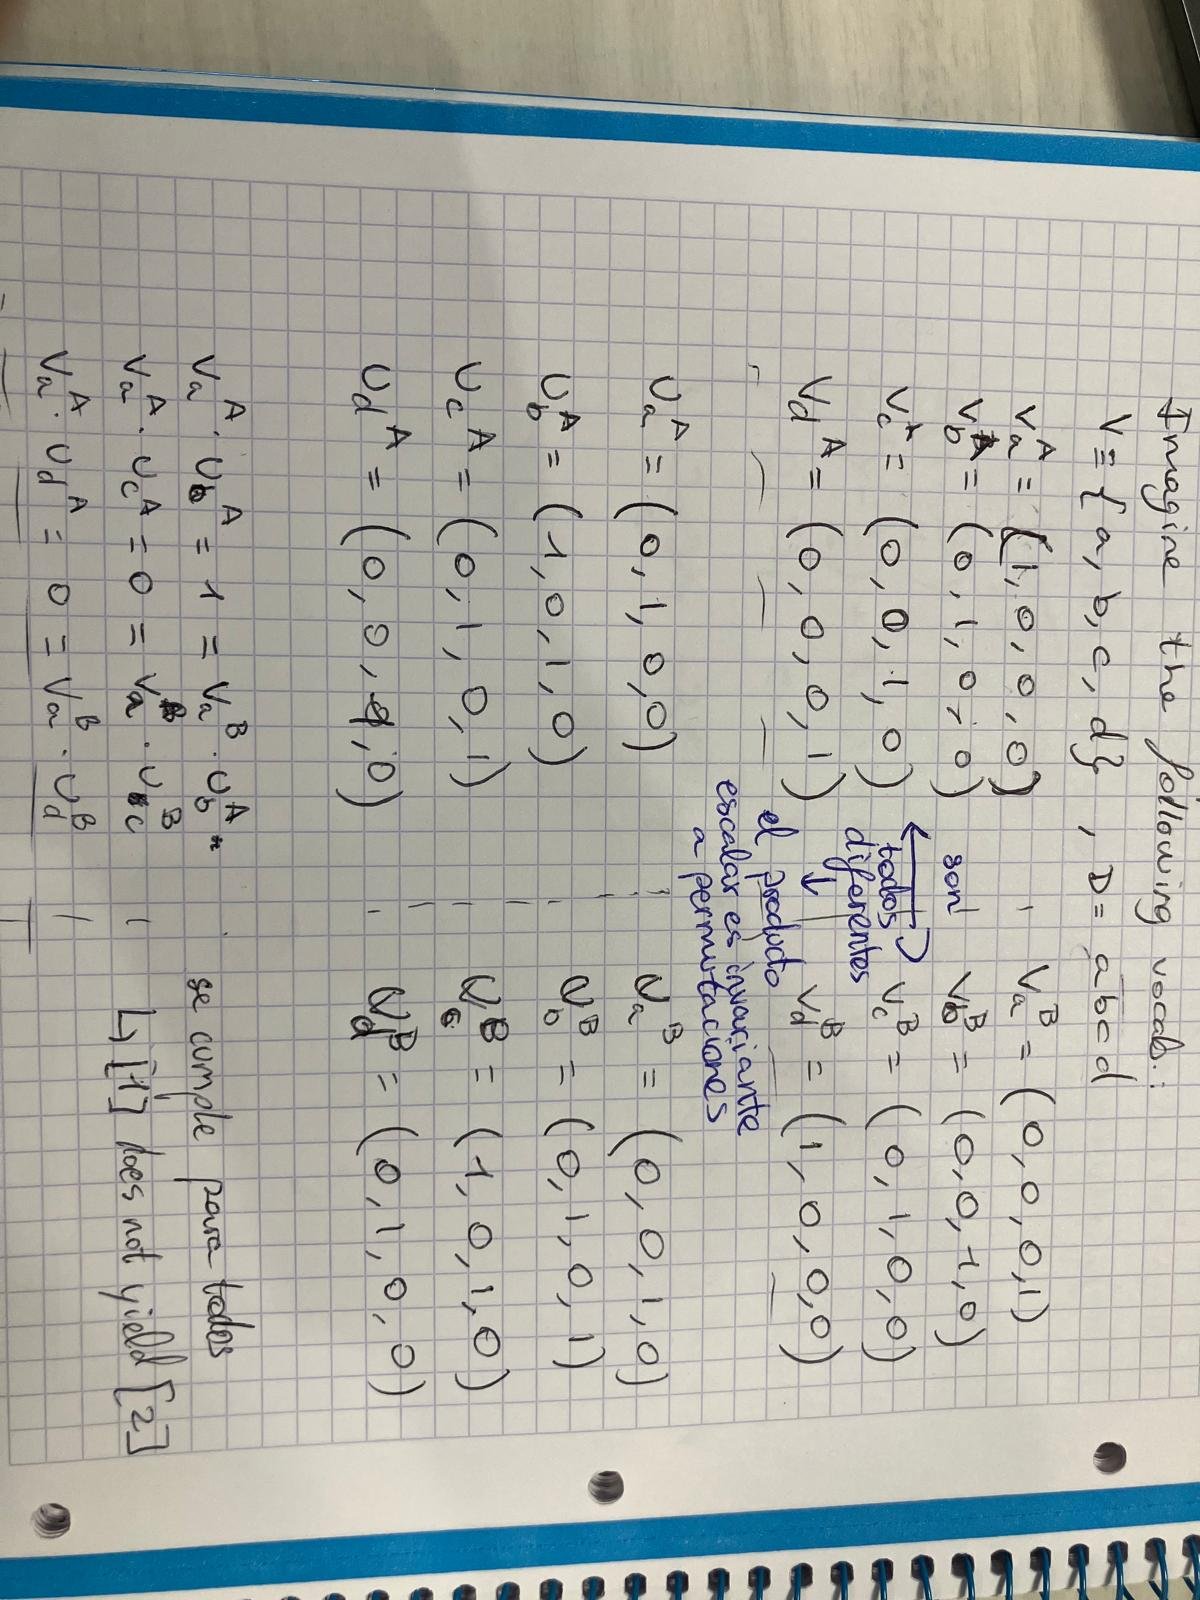*Your answer goes here*.

### Exercise 2: Visualizing $\texttt{skipgram}$ updates [MG]



Complete the two steps of gradient descent, and report the resulting embeddings.

In [2]:
# Embeddings after first update
v2_pizza = (-1.0, 1.0)
v2_pasta = (1.0, 0.0)
u2_italy = (-1/2, 1.0)
u2_pinapple = (1/2, -1.0)
# Embeddings after second update
v3_pizza = (-1/2,1/2)
v3_pasta = (0.378,  1.244)
u3_italy = (0.122, 1)
u3_pinapple = (-0.122,-1.0)

Next, provide your plots for the two runs of gradient descent.

Plot for the embeddings **after the first run of gradient descent**. Change the code below, only where indicated

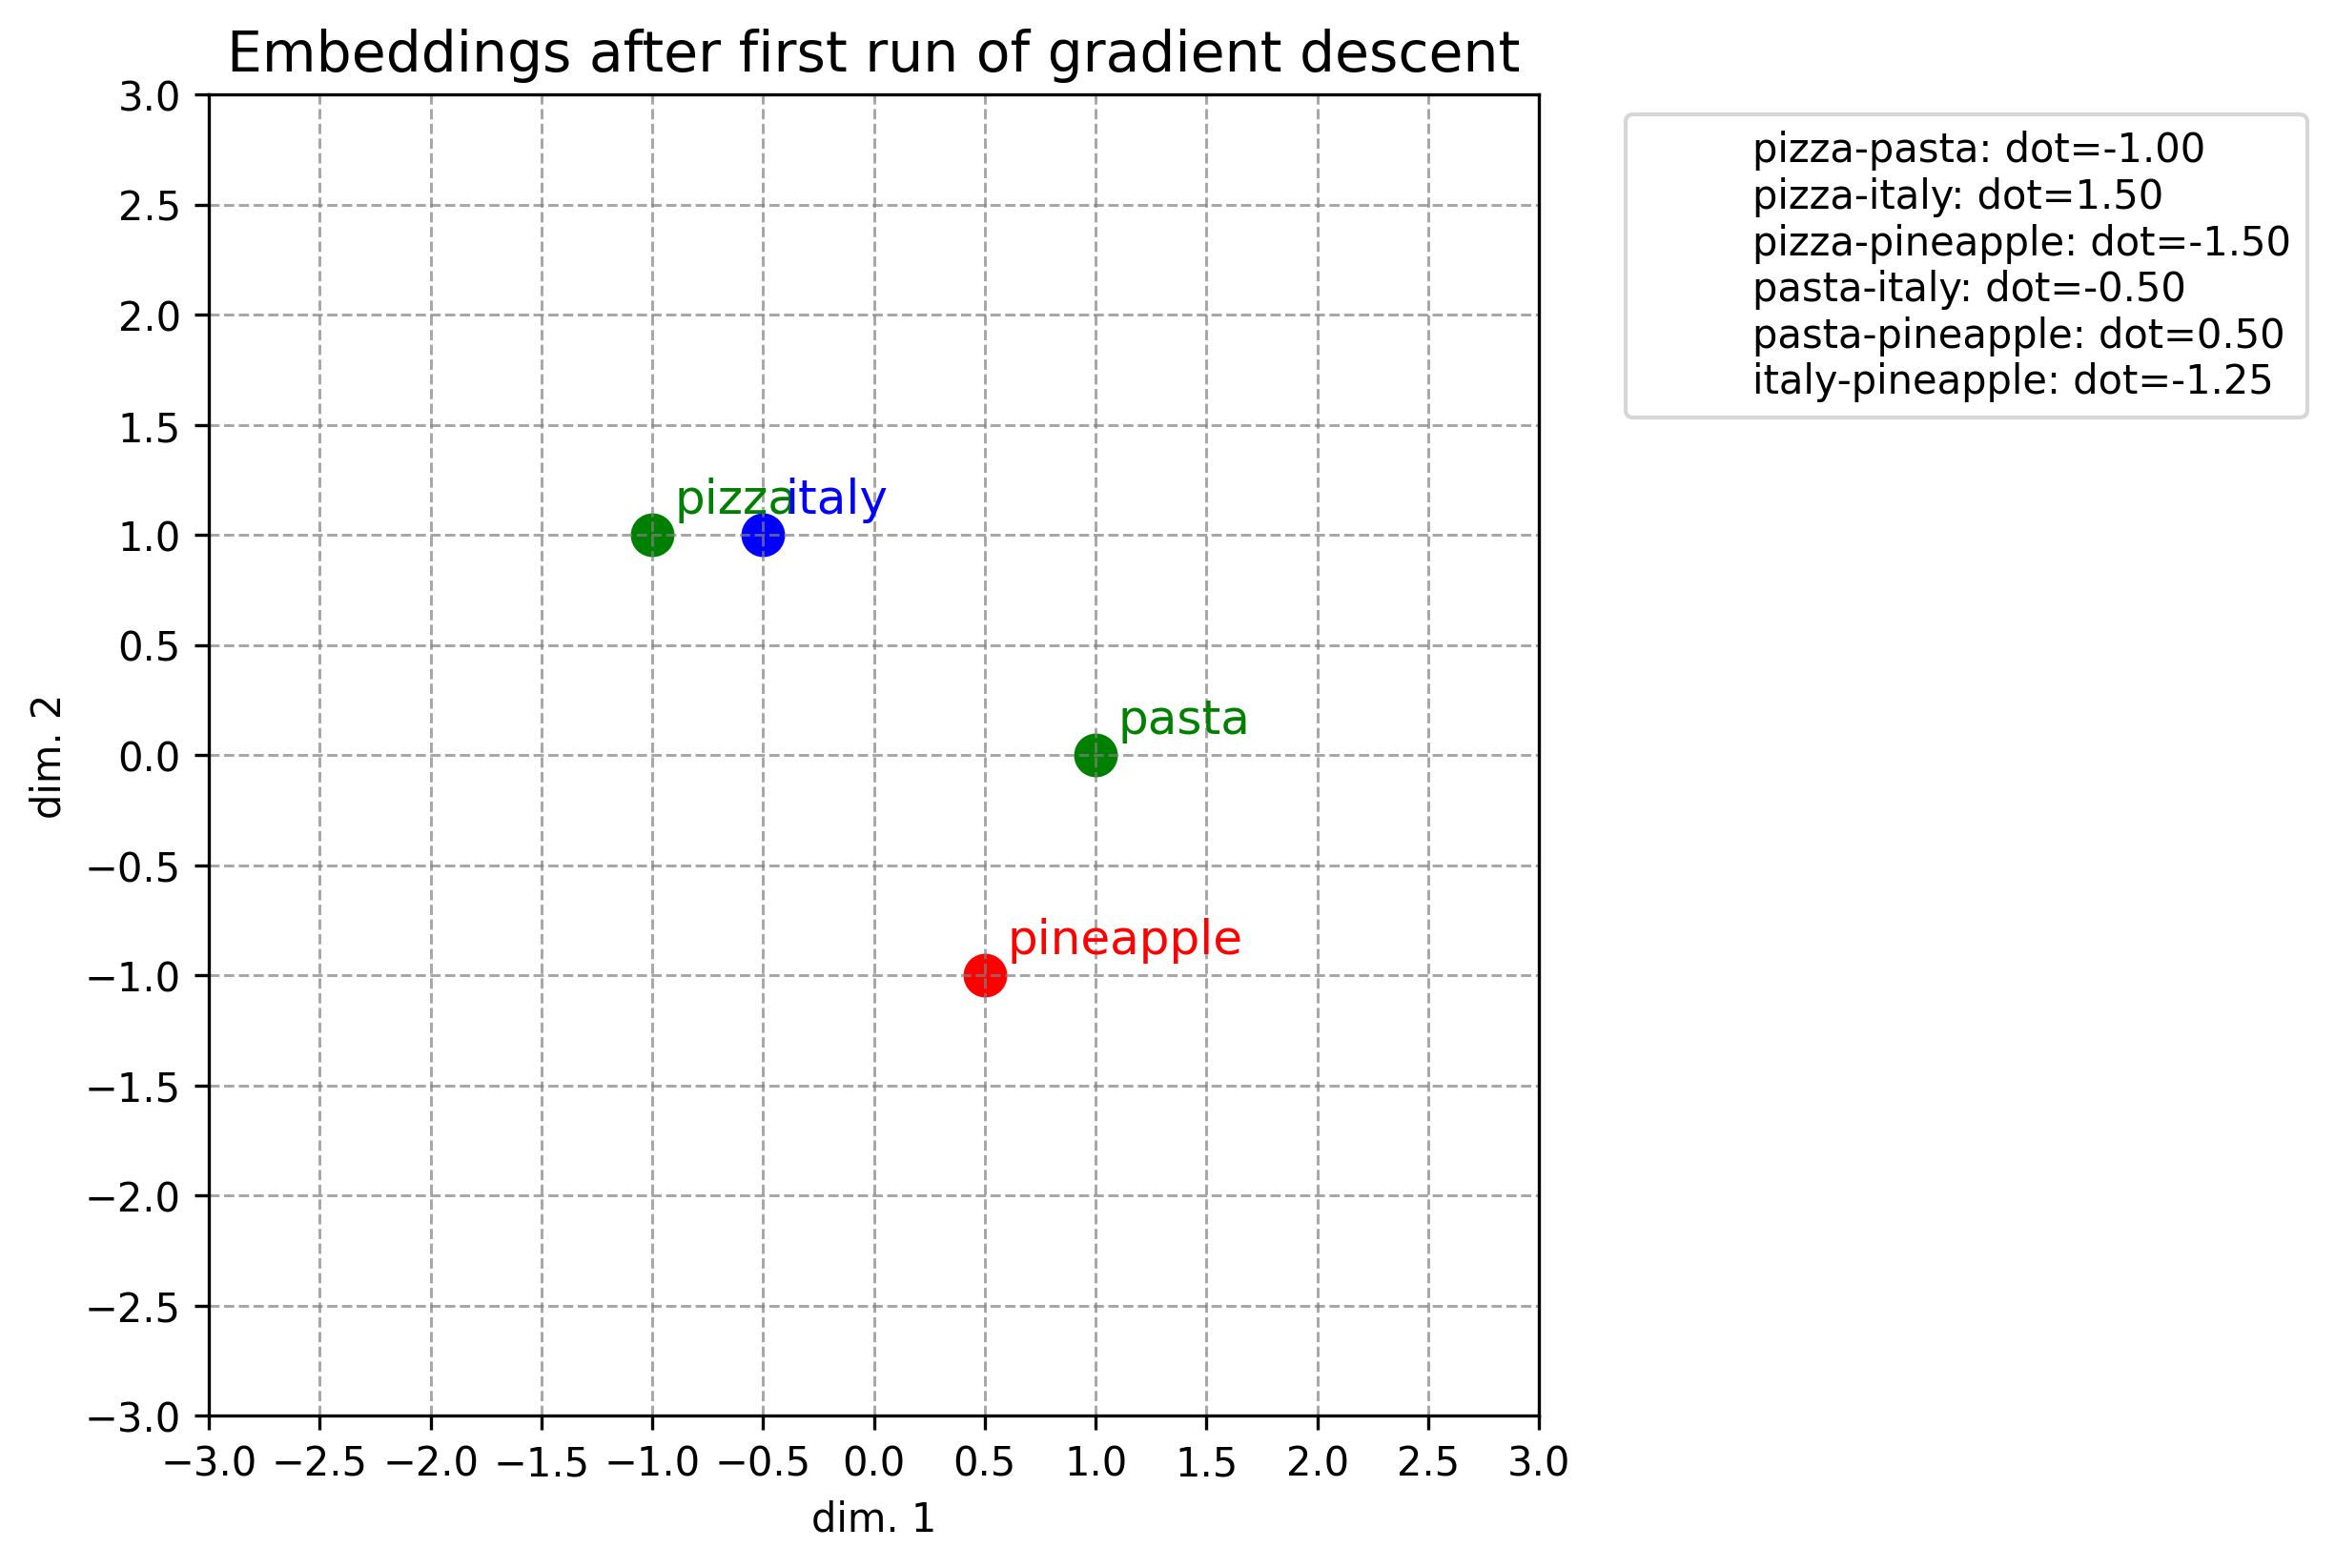

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#---------------------------------------
# Input: Modify these values to update the embeddings
# Do not change anything else in the code.
#---------------------------------------
embeddings = {
    "pizza": np.array([-1.0, 1.0]),      # CHANGE THIS
    "pasta": np.array([ 1.0,  0.0]),      # CHANGE THIS
    "italy": np.array([ -1/2,  1.0]),      # CHANGE THIS
    "pineapple": np.array([ 1/2, -1.0]),  # CHANGE THIS
}

colors = {
    "pizza": "green",
    "pasta": "green",
    "italy": "blue",
    "pineapple": "red",
}

# Function to plot embeddings and compute dot products
def plot_embeddings(embed_dict, color_dict, title="Embeddings after first run of gradient descent", save_as=None, dpi=300):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)

    # Plot each word
    for word, vector in embed_dict.items():
        ax.scatter(vector[0], vector[1], color=color_dict[word], s=100)

        ax.annotate(word,
                    (vector[0], vector[1]),
                    xytext=(vector[0] + 0.1, vector[1] + 0.1),
                    textcoords='data',
                    fontsize=12,
                    color=color_dict[word])

    # Compute dot products
    words = list(embed_dict.keys())
    similarity_texts = []
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            w1, w2 = words[i], words[j]
            dot_prod = np.dot(embed_dict[w1], embed_dict[w2])
            similarity_texts.append(f"{w1}-{w2}: dot={dot_prod:.2f}")

    # Add dot products as a legend
    legend_text = "\n".join(similarity_texts)
    dummy_line = mlines.Line2D([], [], color='black', marker='', linestyle='None', label=legend_text)
    ax.legend(handles=[dummy_line], loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)

    # Formatting
    ax.set_xticks(np.arange(-3, 3.5, 0.5))
    ax.set_yticks(np.arange(-3, 3.5, 0.5))
    ax.grid(True, linestyle="--", linewidth=0.7, color="grey", alpha=0.7)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_xlabel("dim. 1")
    ax.set_ylabel("dim. 2")
    plt.title(title, fontsize=14)

    if save_as:
        plt.savefig(save_as, dpi=dpi, bbox_inches='tight')

    plt.show()

# Run the function
plot_embeddings(embeddings, colors, "Embeddings after first run of gradient descent")

Plot for the embeddings **after the second run of gradient descent**. Change the code below, only where indicated

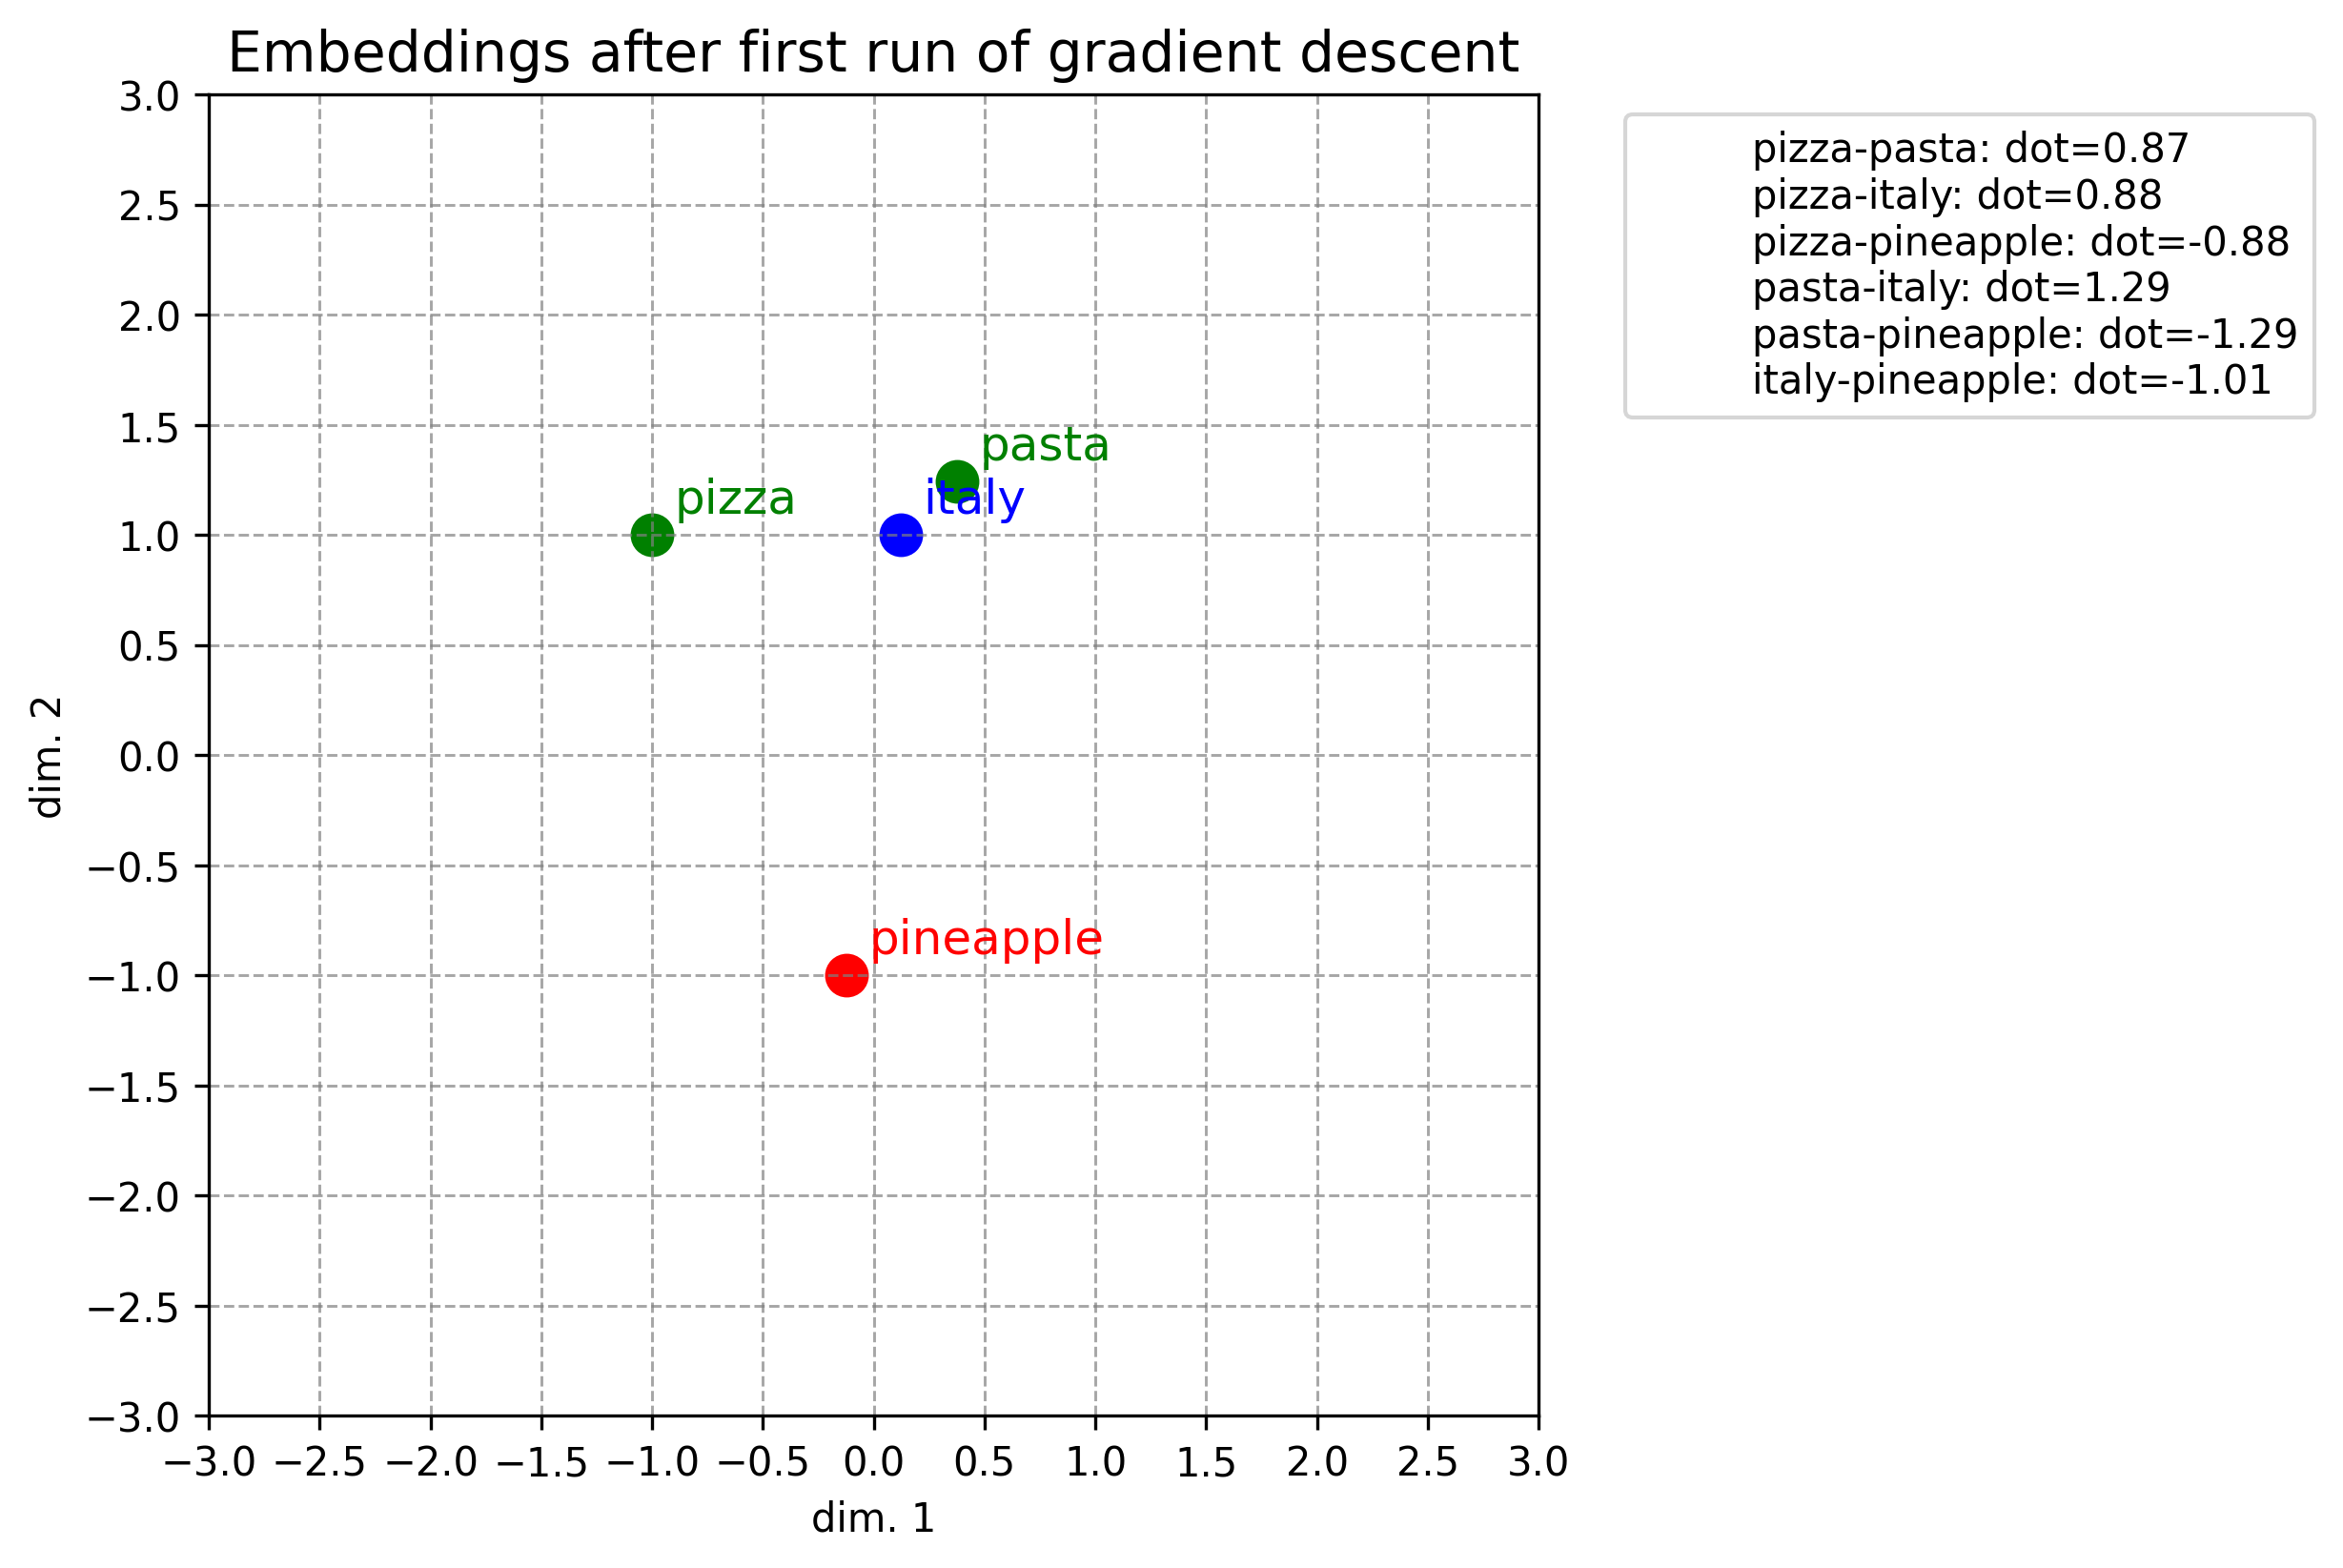

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#---------------------------------------
# Input: Modify these values to update the embeddings
# Do not change anything else in the code.
#---------------------------------------
embeddings = {
    "pizza": np.array([-1.0, 1.0]),      # CHANGE THIS
    "pasta": np.array([ 0.378,  1.244]),      # CHANGE THIS
    "italy": np.array([ 0.122,  1.0]),      # CHANGE THIS
    "pineapple": np.array([ -0.122, -1.0]),  # CHANGE THIS
}

colors = {
    "pizza": "green",
    "pasta": "green",
    "italy": "blue",
    "pineapple": "red",
}

# Function to plot embeddings and compute dot products
def plot_embeddings(embed_dict, color_dict, title="Embeddings after first run of gradient descent", save_as=None, dpi=300):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)

    # Plot each word
    for word, vector in embed_dict.items():
        ax.scatter(vector[0], vector[1], color=color_dict[word], s=100)

        ax.annotate(word,
                    (vector[0], vector[1]),
                    xytext=(vector[0] + 0.1, vector[1] + 0.1),
                    textcoords='data',
                    fontsize=12,
                    color=color_dict[word])

    # Compute dot products
    words = list(embed_dict.keys())
    similarity_texts = []
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            w1, w2 = words[i], words[j]
            dot_prod = np.dot(embed_dict[w1], embed_dict[w2])
            similarity_texts.append(f"{w1}-{w2}: dot={dot_prod:.2f}")

    # Add dot products as a legend
    legend_text = "\n".join(similarity_texts)
    dummy_line = mlines.Line2D([], [], color='black', marker='', linestyle='None', label=legend_text)
    ax.legend(handles=[dummy_line], loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)

    # Formatting
    ax.set_xticks(np.arange(-3, 3.5, 0.5))
    ax.set_yticks(np.arange(-3, 3.5, 0.5))
    ax.grid(True, linestyle="--", linewidth=0.7, color="grey", alpha=0.7)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_xlabel("dim. 1")
    ax.set_ylabel("dim. 2")
    plt.title(title, fontsize=14)

    if save_as:
        plt.savefig(save_as, dpi=dpi, bbox_inches='tight')

    plt.show()

# Run the function
plot_embeddings(embeddings, colors, "Embeddings after first run of gradient descent")